## Phase 1

# Data Visualizations: A Primer

## Why do we visualize data?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-talk')
np.random.seed(2021)
pd.set_option("display.max_columns", None)

df = pd.read_csv('data/anscombes_quartet.csv', index_col=0)

### Looking at the Tables
*Below we see four datasets, each with two dimensions.*

> *`(x_I, y_I), (x_II, y_II), ...`, etc*

*Let's look at the raw data. Can we make any insights?*

In [3]:
# Look at the table(s).
df

,x_I,y_I,x_II,y_II,x_III,y_III,x_IV,y_IV
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


### Looking at the descriptive statistics.
*Perhaps more insight can be gained by reading into the descriptive statistics.*

In [4]:
# Compare descriptive statistics.
def compare_stats(df):
    for xidx, yidx in zip(df.columns, df.columns[1:]):
        if xidx.startswith('y'):
            continue
        print(xidx)
        print(f'Mean of x:\t\t{df[xidx].mean()}')
        print(f'Variance of x:\t\t{df[xidx].var()}')
        print(f'Mean of y:\t\t{round(df[yidx].mean(), 2)}')
        print(f'Variance of y:\t\t{round(df[yidx].var(), 3)}')
        corr_value = round(df[[xidx, yidx]].corr().iloc[0, 1], 3)
        print(f'Correlation of x, y:\t{corr_value}')
        print('*'*40)
        print()

In [5]:
# Look at the stats.
compare_stats(df)

x_I
Mean of x:		9.0
Variance of x:		11.0
Mean of y:		7.5
Variance of y:		4.127
Correlation of x, y:	0.816
****************************************

x_II
Mean of x:		9.0
Variance of x:		11.0
Mean of y:		7.5
Variance of y:		4.128
Correlation of x, y:	0.816
****************************************

x_III
Mean of x:		9.0
Variance of x:		11.0
Mean of y:		7.5
Variance of y:		4.123
Correlation of x, y:	0.816
****************************************

x_IV
Mean of x:		9.0
Variance of x:		11.0
Mean of y:		7.5
Variance of y:		4.123
Correlation of x, y:	0.817
****************************************



### Plotting the datasets.
*We should now attempt to see this dataset geographically.*

In [6]:
def plot_anscombe(df):
    with plt.style.context('seaborn-talk'):
        fig, ax_lst = plt.subplots(
            ncols=2, nrows=2, figsize=(10, 10), sharex=True, sharey=True)
        for ax, label in zip(ax_lst.flatten(), ['I', 'II', 'III', 'IV']):
            x_col = f'x_{label}'
            y_col = f'y_{label}'
            ax.scatter(x=df[x_col], y=df[y_col])
            ax.set(title=label)
        plt.tight_layout()
        plt.show()

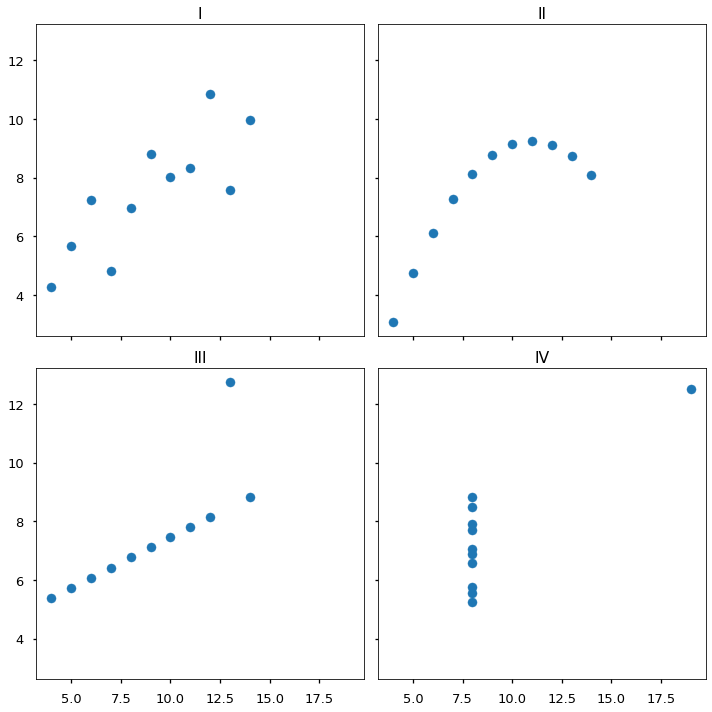

In [7]:
# Look at the plots.
plot_anscombe(df)

### Anscombe's Quartet: Background
> *https://en.wikipedia.org/wiki/Anscombe%27s_quartet*

- The above example is a demonstration created by statistician **Francis Anscombe** in 1973. 
- There was a famous idea (from fellow statisticians) that "*numerical calculations are exact, but graphs are rough.*"

- The demonstration above is a very clear refutation to this concept. 
- With the given datasets, the exact opposite is shown: *numerical calculations can be **misleading**, while graphs can be **insightful**.*

- There is even more to note about the datasets beyond the descriptive statistics:
    - All linear regression lines have the same slope and intercept.
        $$\large y = 3.00 + 0.500x$$
    - All linear regression *coefficient of determinations* *($R^2$)* are the same. 
        $$\large R^2 = 0.67 $$

## How do we visualize data?

### Pre-attentive Attributes
> **Pre-attentive processing** is the subconscious accumulation of information from the environment. All available information is pre-attentively processed. Then, the brain filters and processes what is important. Information that has the highest salience (a stimulus that stands out the most) or relevance to what a person is thinking about is selected for further and more complete analysis by conscious (attentive) processing. Understanding how pre-attentive processing works is useful in advertising, in education, and for prediction of cognitive ability.
>
> - <a href='https://en.wikipedia.org/wiki/Pre-attentive_processing'>*Pre-attentive_processing - Wiki*</a>

- Simply put, *pre-attentive attributes* are attributes our brain processes before we consciously pay attention to them.

In [8]:
# Create a number grid for demo.
NUMBER_GRID = np.random.randint(1, 10, size=(10, 10))

In [9]:
# Count the number of `9`s in this matrix.
pd.DataFrame(NUMBER_GRID)

,0,1,2,3,4,5,6,7,8,9
0,5,6,1,7,6,9,7,7,7,7
1,2,6,8,2,2,6,3,1,4,2
2,1,3,7,5,9,6,2,7,8,6
3,7,6,7,3,5,4,3,9,6,4
4,2,2,3,8,6,4,8,4,5,8
5,8,8,5,4,3,3,6,3,1,5
6,8,4,2,5,3,4,7,7,7,2
7,6,8,2,6,1,1,5,8,4,5
8,8,1,4,7,4,2,4,7,2,9
9,1,6,1,8,1,2,4,7,5,8


In [10]:
# Count the number of `9`s in the matrix now!
(pd.DataFrame(NUMBER_GRID)
 .style
 .applymap(lambda x: 'background-color: yellow' if x == 9 else ''))

,0,1,2,3,4,5,6,7,8,9
0,5,6,1,7,6,9,7,7,7,7
1,2,6,8,2,2,6,3,1,4,2
2,1,3,7,5,9,6,2,7,8,6
3,7,6,7,3,5,4,3,9,6,4
4,2,2,3,8,6,4,8,4,5,8
5,8,8,5,4,3,3,6,3,1,5
6,8,4,2,5,3,4,7,7,7,2
7,6,8,2,6,1,1,5,8,4,5
8,8,1,4,7,4,2,4,7,2,9
9,1,6,1,8,1,2,4,7,5,8


In [11]:
NUMBER_GRID_LARGE = np.random.randint(1, 9, size=(10, 40))
NUMBER_GRID_LARGE[3, 31] = 9

In [12]:
# How about now?
(pd.DataFrame(NUMBER_GRID_LARGE)
 .style
 .applymap(lambda x: 'background-color: yellow' if x == 9 else ''))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,2,5,2,8,2,8,5,2,7,7,7,7,8,6,3,5,4,2,6,3,4,3,1,1,8,5,4,7,7,2,7,4,8,8,5,5,8,5,4,8
1,5,4,7,3,6,2,6,6,3,6,8,2,2,5,2,3,7,7,8,5,4,6,5,3,1,1,5,6,2,6,2,4,1,2,3,6,3,7,7,4
2,8,6,3,5,5,2,4,6,7,3,2,3,4,8,3,2,6,4,4,6,8,1,3,4,1,1,8,1,4,1,2,4,3,3,4,4,5,1,4,2
3,6,7,3,4,6,8,3,4,1,3,3,8,8,2,3,1,7,5,2,7,4,2,8,6,4,3,3,5,3,4,4,9,6,2,1,2,1,4,1,2
4,2,7,6,2,4,5,6,8,3,6,8,6,1,4,7,3,7,7,6,5,4,5,5,2,7,3,2,8,3,5,3,8,5,2,1,4,3,8,6,5
5,5,8,5,7,1,8,2,8,3,8,6,7,5,1,6,4,3,4,1,6,5,8,2,6,6,7,6,8,5,6,8,7,1,1,5,5,6,1,4,4
6,5,8,3,3,5,1,3,2,2,2,6,8,6,4,5,7,1,4,4,3,1,1,7,1,5,3,8,8,5,4,7,7,8,1,4,3,2,2,2,7
7,2,2,6,6,5,6,6,3,5,2,4,6,3,1,6,5,5,7,3,7,3,1,7,4,2,8,1,7,7,4,8,5,8,6,3,7,5,3,6,2
8,8,8,2,7,8,8,8,8,1,4,7,4,7,4,4,1,4,2,3,8,2,4,7,2,3,4,8,3,7,1,8,6,8,5,4,1,8,1,4,5
9,4,8,3,5,6,3,2,1,2,7,6,5,5,3,4,5,6,2,8,2,7,6,7,4,5,5,3,8,3,8,7,4,6,1,8,8,4,4,3,1


In [13]:
def plot_features():
    """
    Demonstrate some pre-attentive attributes, namely:
    
    - Length
    - Width
    - Size
    - Shape
    - Color
        - Hue
        - Value
    - Position
    - Marks
    """
    
    labels = [
        ('Length', 'bar', 
         dict(x=[1,2,3,4], 
              height=[2,5,2,2],
              width=0.2,
              color='lightgrey')),
        ('Width', 'bar', 
         dict(x=[1,2,3,4], 
              height=[2,2,2,2], 
              width=[0.2, 0.8, 0.2, 0.2],
              color='lightgrey')),
        ('Size', 'scatter', 
         dict(x=[1,1,1,2,2,2,3,3,3], 
              y=[1,2,3,1,2,3,1,2,3], 
              s=[200,200,200,200,200,200,200,1200,200],
              color='lightgrey')),
        ('Shape', 'shape-scatter', 
         dict(x=[1,1,1,2,2,2,3,3,3], 
              y=[1,2,3,1,2,3,1,2,3], 
              s=200,
              color='lightgrey')),
        ('Color - Hue', 'scatter', 
         dict(x=[1,1,1,2,2,2,3,3,3], 
              y=[1,2,3,1,2,3,1,2,3], 
              s=200, 
              color=['lightgrey','lightgrey','lightgrey',
                     'lightgrey','lightgrey','lightgrey',
                     'lightgrey','tab:red','lightgrey'])),
        ('Color - Value', 'scatter',
         dict(x=[1,1,1,2,2,2,3,3,3], 
              y=[1,2,3,1,2,3,1,2,3], 
              s=200, 
              color=['lightgrey','lightgrey','lightgrey',
                     'lightgrey','lightgrey','lightgrey',
                     'lightgrey','black','lightgrey'])),
        ('Position', 'scatter',  
         dict(x=[1,1,1,2,2,2,3,4,3], 
              y=[1,2,3,1,2,3,1,2,3], 
              s=200, 
              color='lightgrey')),
        ('Label', 'label-scatter', 
         dict(x=[1,1,1,2,2,2,3,3,3], 
              y=[1,2,3,1,2,3,1,2,3], 
              s=200, 
              color='lightgrey'))
    ]
    
    # Make plot.
    with plt.style.context('seaborn-talk'):
        fig, ax_lst = plt.subplots(ncols=4, nrows=2, figsize=(16, 8))
        for (label, plot_type, kwargs), ax in zip(labels, 
                                                  ax_lst.flatten()):
            if plot_type == 'bar':
                ax.bar(**kwargs)
            elif plot_type == 'scatter':
                ax.scatter(**kwargs)
            elif plot_type == 'label-scatter':
                ax.scatter(**kwargs)
                ax.annotate(
                    'Look!', 
                    (3, 2), 
                    xytext=(2.5, 1.5), 
                    arrowprops=dict(arrowstyle='simple')
                    )
            elif plot_type == 'shape-scatter':
                # No functionality to have different marker types on the same scatter.
                for idx, (x, y) in enumerate(zip(kwargs['x'], kwargs['y'])):
                    if idx == 4:
                        marker = 'x'
                    else:
                        marker = 'o'
                    ax.scatter(
                        x, y, 
                        s=kwargs['s'], 
                        color=kwargs['color'], 
                        marker=marker)
            ax.set(title=label)
            ax.set_xlim(-0.5, 4.5)
            ax.set_ylim(0, 4)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.tight_layout()
        plt.show()

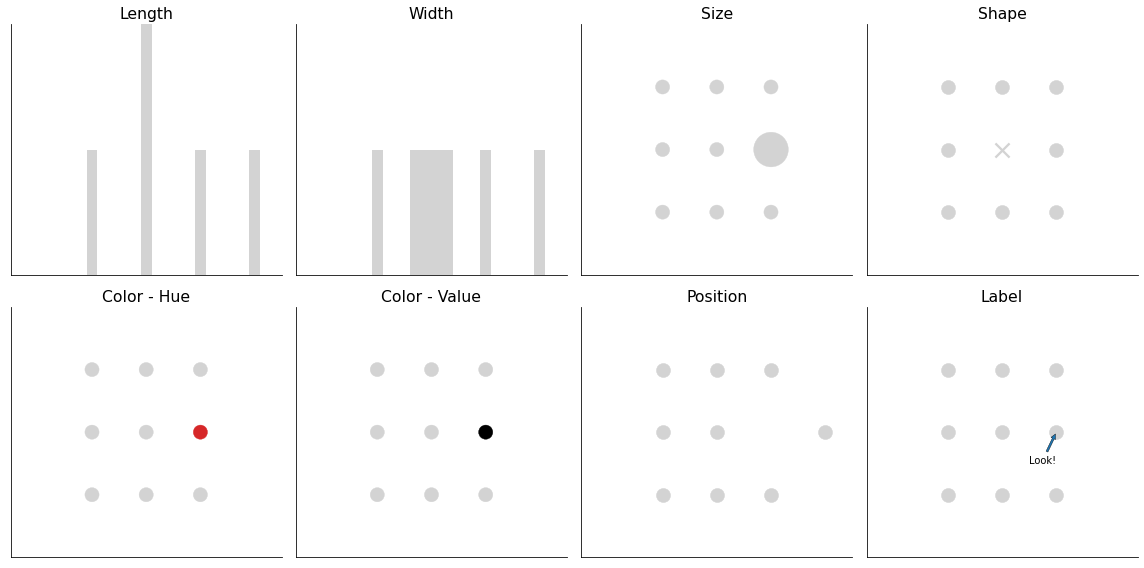

In [14]:
# Demonstration of different pre-attentive features.
plot_features()

## A Note on Color

- Color is often used recklessly. Many times, people will try to add "excitement" to a visualization by using color.

In [15]:
def apply_bg_colormap(n):
    dct = {
        0: 'red',
        1: 'orange',
        2: 'yellow',
        3: 'green',
        4: 'blue',
        5: 'magenta',
        6: 'violet',
        7: 'olive',
        8: 'firebrick',
        9: 'lightcyan'
    }
    return f'background-color: {dct[n]}'

In [16]:
### Not a good use of color!
# Adding colors can be more distracting than helpful!
(pd.DataFrame(NUMBER_GRID)
 .style
 .applymap(apply_bg_colormap))

,0,1,2,3,4,5,6,7,8,9
0,5,6,1,7,6,9,7,7,7,7
1,2,6,8,2,2,6,3,1,4,2
2,1,3,7,5,9,6,2,7,8,6
3,7,6,7,3,5,4,3,9,6,4
4,2,2,3,8,6,4,8,4,5,8
5,8,8,5,4,3,3,6,3,1,5
6,8,4,2,5,3,4,7,7,7,2
7,6,8,2,6,1,1,5,8,4,5
8,8,1,4,7,4,2,4,7,2,9
9,1,6,1,8,1,2,4,7,5,8


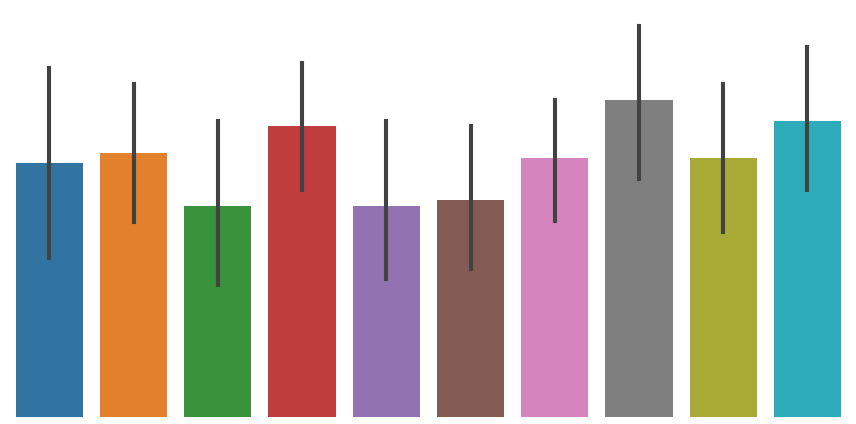

In [17]:
### Not a good use of color!
# Color in this plot is redundant to the x-axis.
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=NUMBER_GRID, ax=ax)
ax.axis('off')
fig.tight_layout()

### Using Color Effectively

#### *Sequential Colors*
<img src='images/irish-american.jpeg' width=500>

#### *Diverging Colors*

<img src='images/1times.png' width=500>

#### *Categorical Colors*

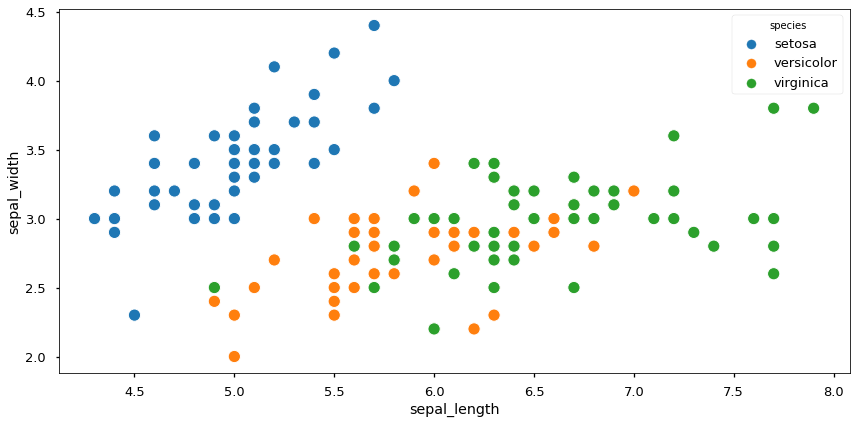

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(
    x='sepal_length', y='sepal_width', hue='species', 
    data=sns.load_dataset('iris'), s=150, ax=ax
    )
fig.tight_layout()

In [19]:
highest_mean_idx = np.argmax(NUMBER_GRID.mean(axis=0))
lowest_mean_idx = np.argmin(NUMBER_GRID.mean(axis=0))
colors = ['tab:blue' if c == highest_mean_idx 
          else 'tab:red' if c == lowest_mean_idx
          else 'lightgrey'
          for c in range(NUMBER_GRID.shape[0])]

In [20]:
colors

['lightgrey',
 'lightgrey',
 'tab:red',
 'lightgrey',
 'lightgrey',
 'lightgrey',
 'lightgrey',
 'tab:blue',
 'lightgrey',
 'lightgrey']

### Highlight / Alert

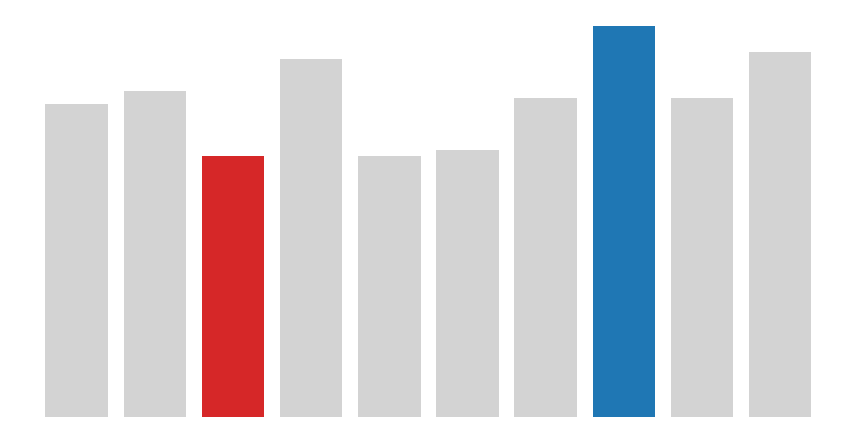

In [21]:
# The color in this plot is used to highlight a certain value.
# Blue is a highlight, Red is an alert.
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x=range(10), height=NUMBER_GRID.mean(axis=0), color=colors)
ax.axis('off')
fig.tight_layout()

# Common Chart Types

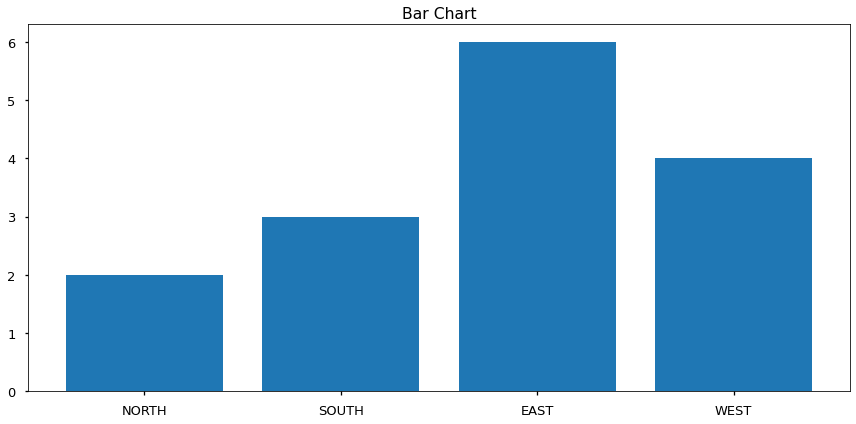

In [22]:
# Bar
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x=['NORTH', 'SOUTH', 'EAST', 'WEST'], height=[2,3,6,4], color='tab:blue')
ax.set(title='Bar Chart')
fig.tight_layout()

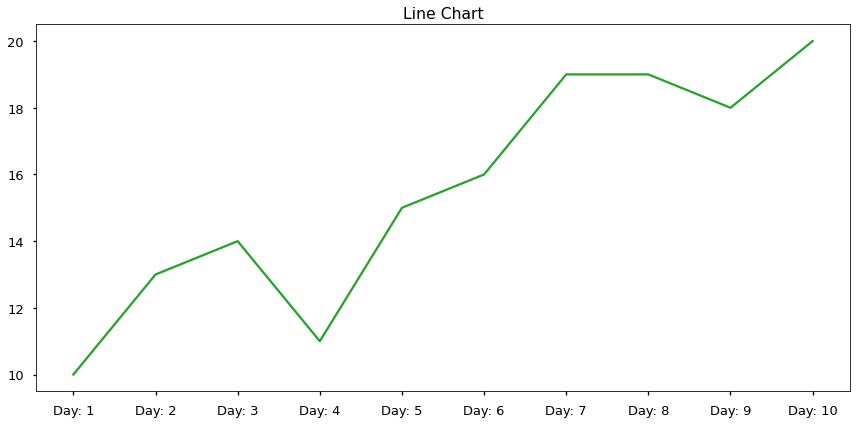

In [23]:
# Line
fig, ax = plt.subplots(figsize=(12,6))
ax.plot([f'Day: {x}' for x in range(1, 11)], 
        [10,13,14,11,15,16,19,19,18,20], 
        color='tab:green')
ax.set(title='Line Chart')
fig.tight_layout()

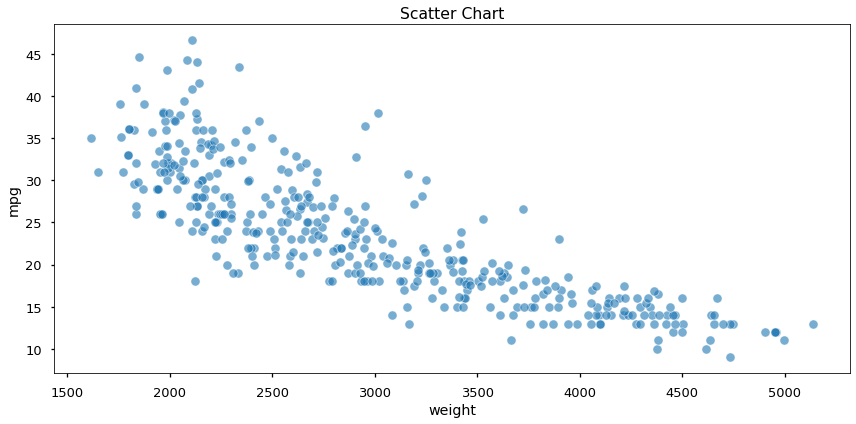

In [24]:
# Scatter
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='weight', y='mpg', data=sns.load_dataset('mpg'), alpha=0.6)
ax.set(title='Scatter Chart')
fig.tight_layout()

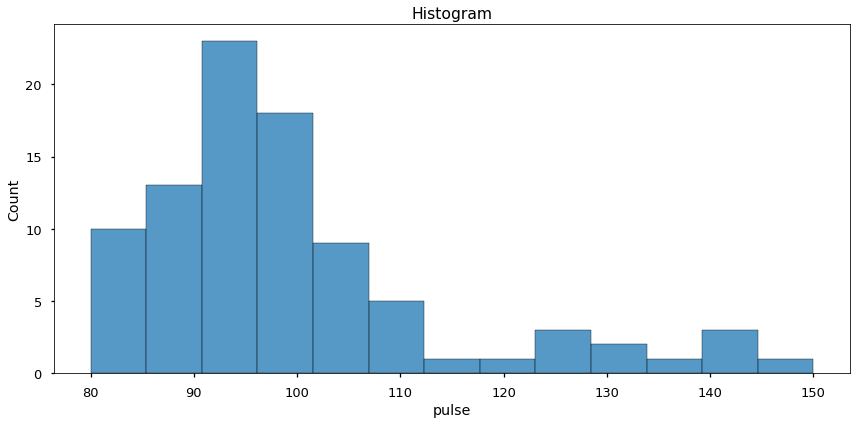

In [25]:
# Histogram
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x='pulse',
             data=sns.load_dataset('exercise'),
             ax=ax)
ax.set(title='Histogram')
fig.tight_layout()

# Recommended Strategy

Importantly, choosing the right visualization should almost always begin with asking "***What do I want to show?***" rather than "*What chart should I use?*".

- Comparison
- Proportion
- Relationship
- Part of a Whole
- Distribution
- Patterns
- Range
- Data Over Time

---

Once this is established, thinking about ***how*** to show this becomes much simpler.

# Visualization Checklist
> ***TDWI*** *(Transforming Data with Intelligence)*
>
> *...a checklist of criteria to evaluate the overall impact that can be achieved with a visual design.*

- Know the *Intent*
- Know the *Messaging*
- Know the *Audience*

- Fitted to audience
- Fitted to purpose
- Accurate
- Distortion free
- Precise
- Clear
- Understandable
- Visually appealing
- Communicates knowledge
- Encourages comparisons
- Tells a story
- Inspires conversations

# Recommended Readings

- <a href='https://matplotlib.org/stable/tutorials/colors/colormaps.html'>*Matplotlib - Colormaps*</a>

---

- <a href='https://datavizcatalogue.com/'>*Data Viz Catalogue - Search Charts by Function or Type*</a>
- <a href='https://drive.google.com/file/d/1_lDSciPz9s_hidr0imPg-3moj5hRCoEH/view?usp=sharing'>*Chart Suggestions - A Thought-Starter*</a>
- <a href='https://www.tableau.com/learn/articles/data-visualization-tips'>*Tableau - Data Visualization Tips*</a>
- <a href='https://www.tableau.com/iron-viz/gallery'>*Tableau - Iron Viz Gallery*</a>
> *Iron Viz—the world’s largest virtual data visualization competition—ignites and showcases the power of the Tableau Community, giving you the opportunity to interact with data rockstars worldwide. Three finalists will advance to the 2021 Iron Viz Championship this November.*
> - *https://www.tableau.com/community/iron-viz*
- <a href='https://www.bigbookofdashboards.com/'>*Big Book of Dashboards*</a>
- <a href='https://tdwi.org/Home.aspx'>*Transforming Data with Intelligence (TDWI)*</a>
- <a href='https://www.gooddata.com/blog/8-ways-turn-good-data-great-visualizations/'>*Good Data - 8 Ways to Turn Good Data into Great Visualizations*</a>